In [21]:
####IMPORTING ALL THE REQUIRED FILES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [22]:
###NOW LOADING THE DATA AND READING THE FIRST 10 DATA LINES OF DATA THROUGH HEAD FUNCTION
heart = pd.read_csv("heart_cleveland_upload.csv")
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [23]:
# BY USING info() method we are getting the concise summary of out dataset
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [24]:
### In above summary We can see that there are total 297 rows and 14 columns present in the dataset. 
### The summary also includes list of all columns with their data types and the number of non-null values in each column. 
### We also have the value of rangeindex provided for the index axis.

In [25]:
### CREATING A COPY OF A DATASET SO THAT THE ORIGINAL DATASET WILL NOT GET AFFECTED
heart_df = heart.copy()

In [26]:
# Renaming the column 
heart_df = heart_df.rename(columns={'condition':'target'})
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [27]:
### Let's check if there is any Null value using isnull() method and sum() them to find how many are there
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

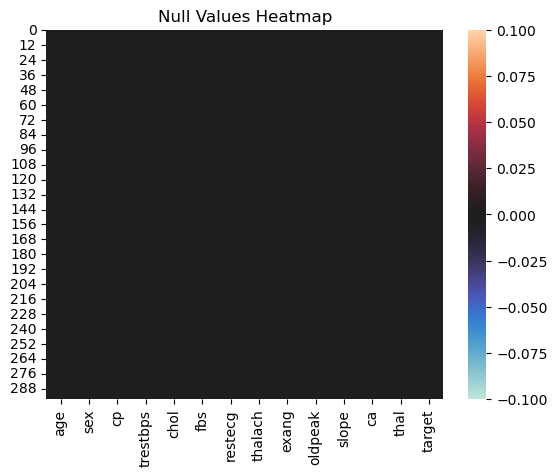

In [28]:
### heatmap to visualise null valuespresent in data
sns.heatmap(heart_df.isnull(),cmap="icefire")
plt.title('Null Values Heatmap')
plt.show()

In [29]:
# lets find unique values in dataset using nunique() method. it exclude NA values by default.
heart_df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [30]:
### EXPLORING THE DATA

In [31]:
### CHECKING DISTRIBUTION OF TARGET (HEART DISEASE OUTPUT)
heart_df['target'].value_counts()

0    160
1    137
Name: target, dtype: int64

In [32]:
### 0 -> MEANS POSITIVE HEART DISEASE
### 1 -> NOT A HEART DISEASE

In [33]:
# Percentage of patients have and do not have heart disease
heart_df['target'].value_counts()/heart_df.shape[0]*100

0    53.872054
1    46.127946
Name: target, dtype: float64

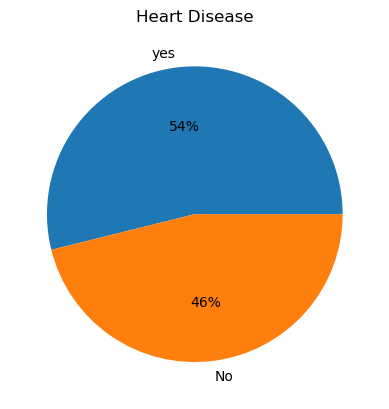

In [34]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = heart_df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

In [35]:
## ABOVE DESCRIBES A PLOT TO DISPLAY HEART DISEASE COUNT
## As 54% of the person have heart attack so data is almost balanced so no need to balance the data.

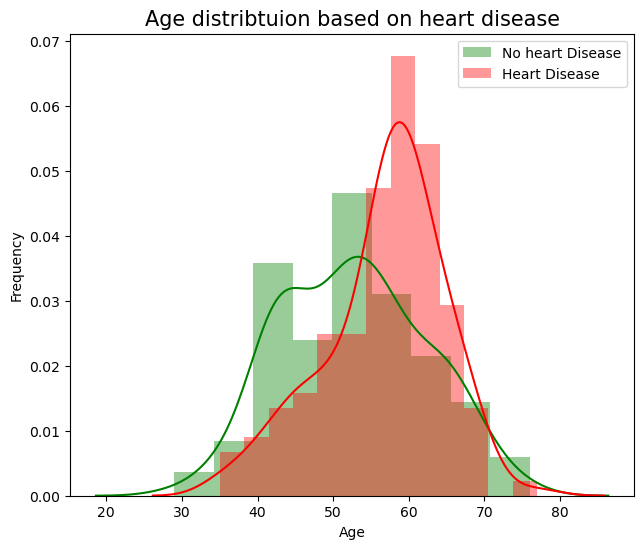

In [36]:
###Age distribution based on heart disease
fig=plt.figure(figsize=(16,6))
fig = plt.subplot(121)
sns.distplot(heart_df[heart_df['target'] == 0]["age"], color='green',label='No heart Disease') 
sns.distplot(heart_df[heart_df['target'] == 1]["age"], color='red',label='Heart Disease') #Red for heart disease
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribtuion based on heart disease', fontsize=15)
plt.legend()
plt.show()

In [37]:
### INFORMATION FROM PLOT

In [38]:
# Get min, max and average of the age of the people do not have heart diseas
print('Min age of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['age']))
print('Max age of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['age']))
print('Average age of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.64375


In [42]:
# Get min, max and average of the age of the people have heart diseas
print('Min age of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['age']))
print('Max age of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['age']))
print('Average age of people who have heart disease: ', heart_df[heart_df['target'] == 1]['age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.75912408759124


In [43]:
###From above plot we can infer that People having age 40-75 are more likely to have heart disease.

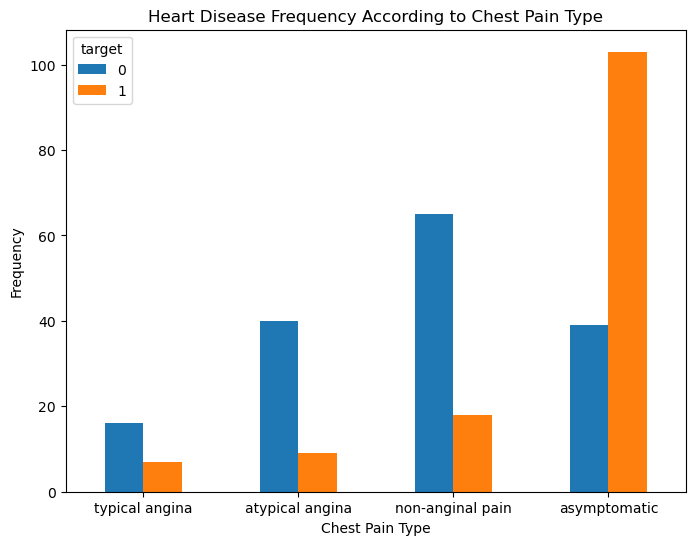

In [50]:
### Heart disease frequency according to chest pain types
pd.crosstab(heart_df.cp,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [51]:
### We can see that most of the people with the heart disease have asymptomatic* chest pain.*

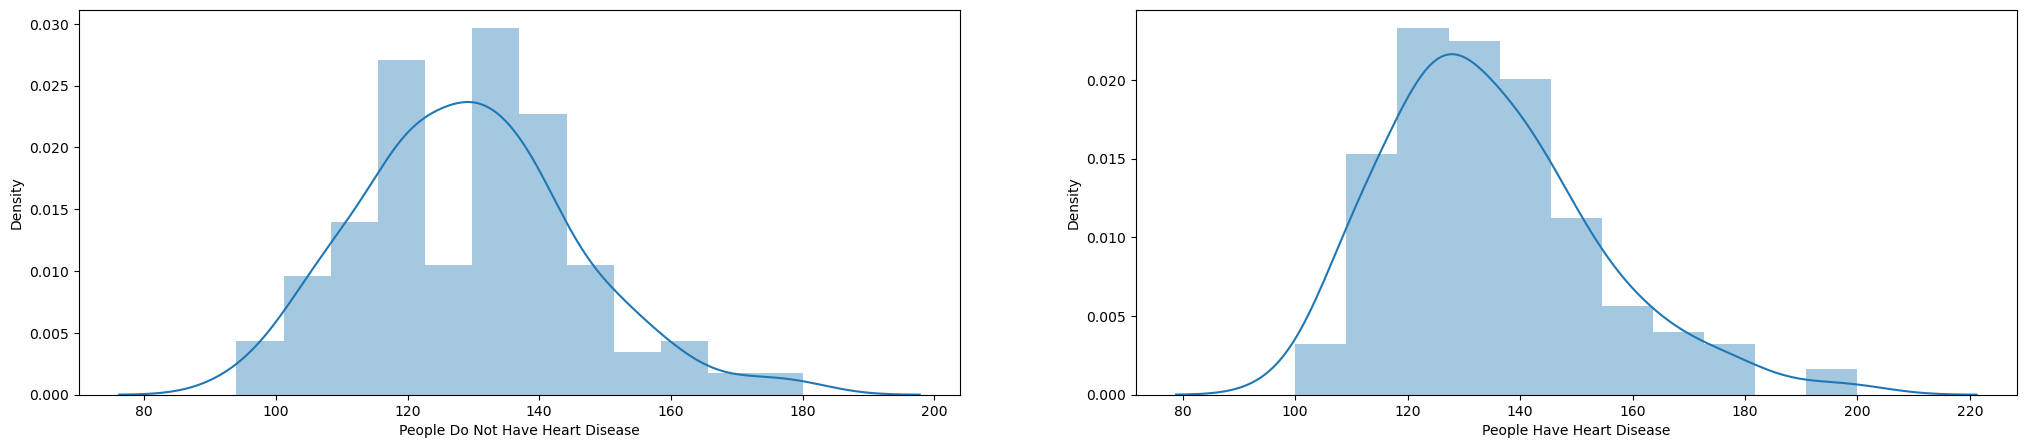

In [52]:
### Blood pressure distribution based on heart rate
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['trestbps'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['trestbps'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [53]:
# Get min, max and average of the  blood pressure of the people do not have heart diseas
print('Min blood pressure of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['trestbps']))
print('Max blood pressure of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['trestbps']))
print('Average blood pressure of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['trestbps'].mean())

Min blood pressure of people who do not have heart disease:  94
Max blood pressure of people who do not have heart disease:  180
Average blood pressure of people who do not have heart disease:  129.175


In [54]:
# Get min, max and average of the blood pressure of the people have heart diseas
print('Min blood pressure of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['trestbps']))
print('Max blood pressure of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['trestbps']))
print('Average blood pressure of people who have heart disease: ', heart_df[heart_df['target'] == 1]['trestbps'].mean())

Min blood pressure of people who have heart disease:  100
Max blood pressure of people who have heart disease:  200
Average blood pressure of people who have heart disease:  134.63503649635035


In [49]:
### People having blood pressure between 110 to 140* are more likely to have a heart attack*

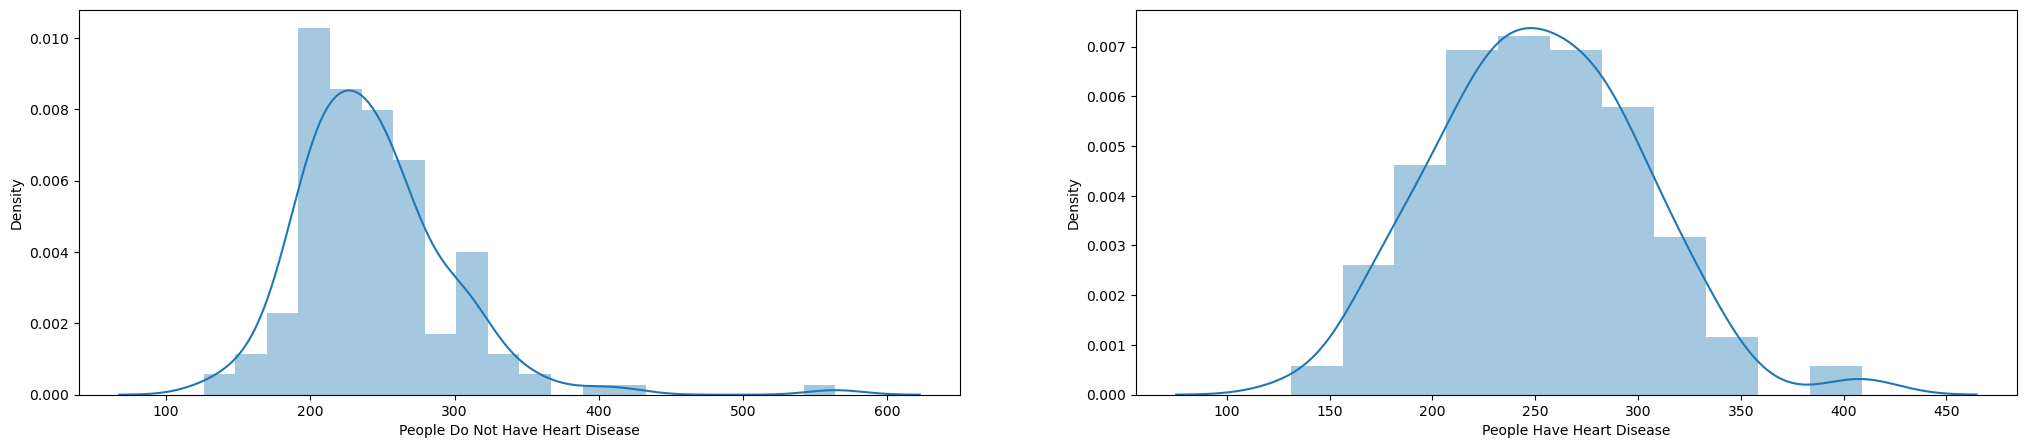

In [55]:
### Cholesterol distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['chol'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['chol'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

In [56]:
# Get min, max and average of the Cholestoral of the people do not have heart diseas
print('Min cholestoral of people who do not have heart disease: ', min(heart_df[heart_df['target'] == 0]['chol']))
print('Max cholestoral of people who do not have heart disease: ', max(heart_df[heart_df['target'] == 0]['chol']))
print('Average cholestoral of people who do not have heart disease: ', heart_df[heart_df['target'] == 0]['chol'].mean())

Min cholestoral of people who do not have heart disease:  126
Max cholestoral of people who do not have heart disease:  564
Average cholestoral of people who do not have heart disease:  243.49375


In [57]:
# Get min, max and average of the Cholestoral of the people have heart diseas
print('Min cholestoral of people who have heart disease: ', min(heart_df[heart_df['target'] == 1]['chol']))
print('Max cholestoral of people who have heart disease: ', max(heart_df[heart_df['target'] == 1]['chol']))
print('Average cholestorale of people who have heart disease: ', heart_df[heart_df['target'] == 1]['chol'].mean())

Min cholestoral of people who have heart disease:  131
Max cholestoral of people who have heart disease:  409
Average cholestorale of people who have heart disease:  251.85401459854015


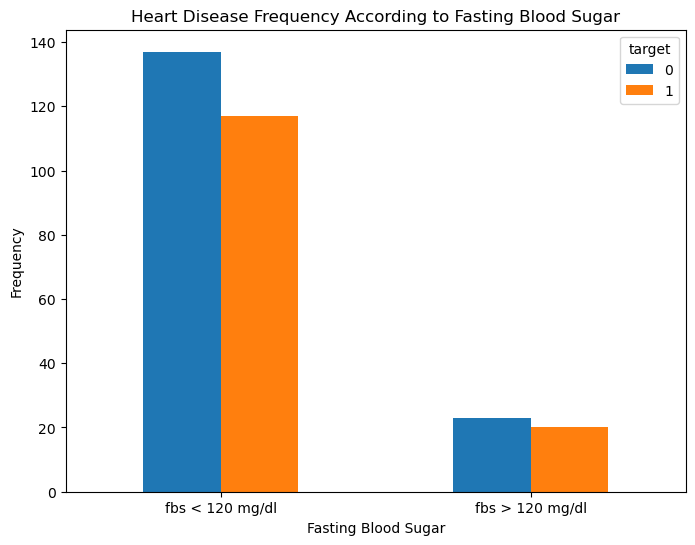

In [58]:
### Heart Disease Frequency According to Fasting Blood Sugar
pd.crosstab(heart_df.fbs,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

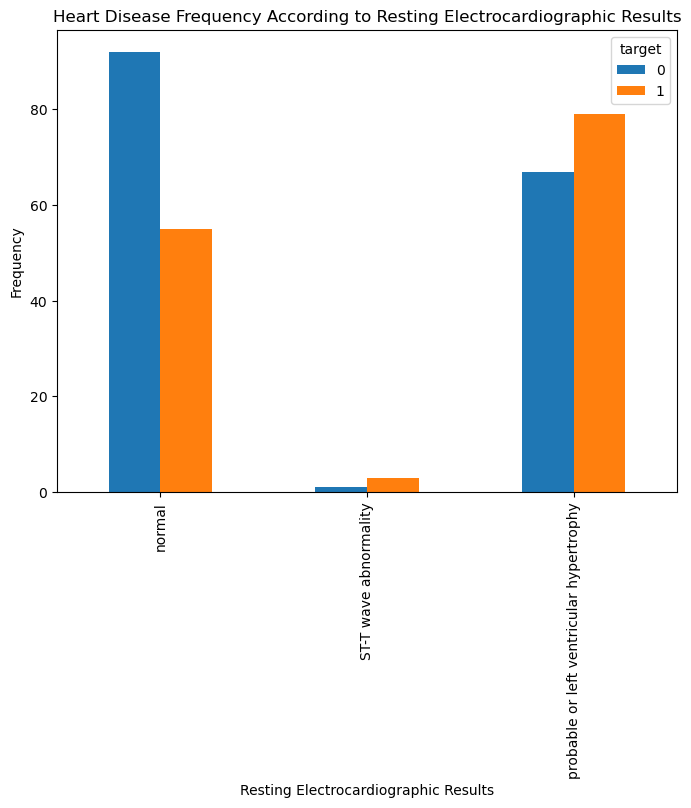

In [59]:
#### Heart Disease Frequency According to Resting Electrocardiographic Results
pd.crosstab(heart_df.restecg,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Resting Electrocardiographic Results')
plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', 'probable or left ventricular hypertrophy'))
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

In [60]:
### Usually the people who do not have heart disease have normal electrocardiographic
## whereas the people who have heart disease have probable or left ventricular hypertrophy.

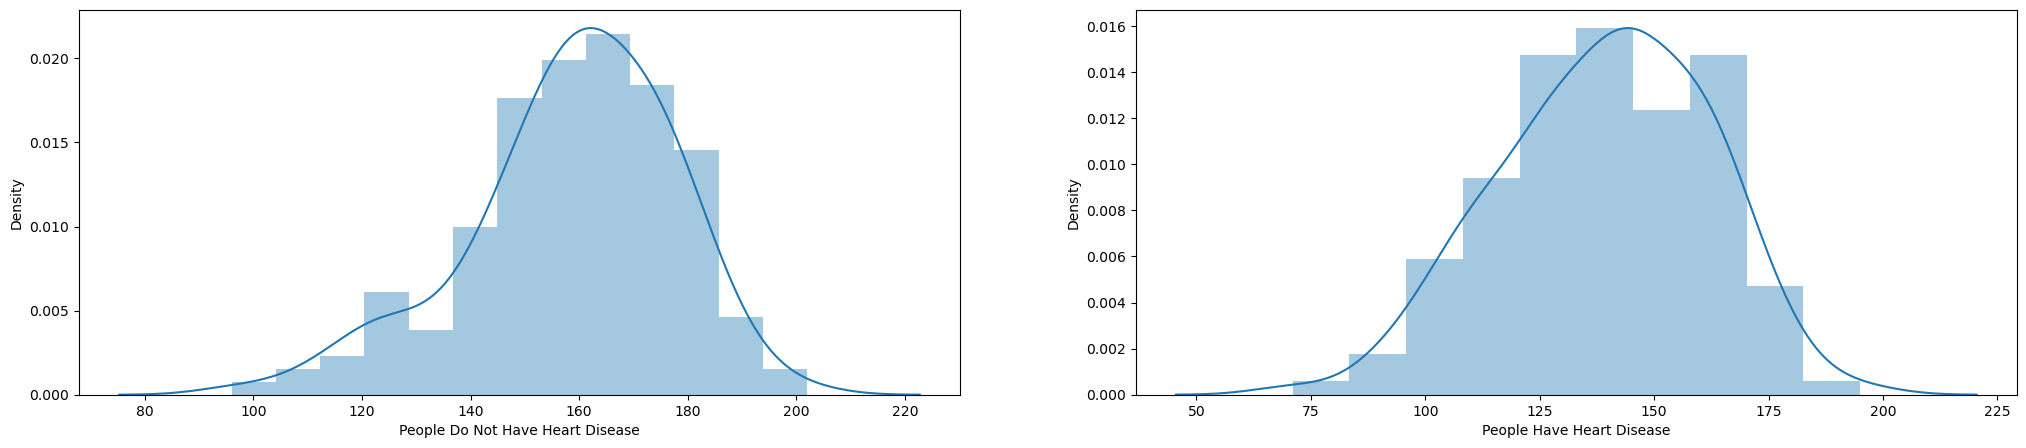

In [61]:
### Maximum heart rate distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heart_df[heart_df['target'] == 0]['thalach'], label='Do not have heart disease', ax = axis1)
ax.set(xlabel = 'People Do Not Have Heart Disease')
ax = sns.distplot(heart_df[heart_df['target'] == 1]['thalach'], label = 'Have heart disease', ax = axis2)
ax.set(xlabel = 'People Have Heart Disease')
plt.show()

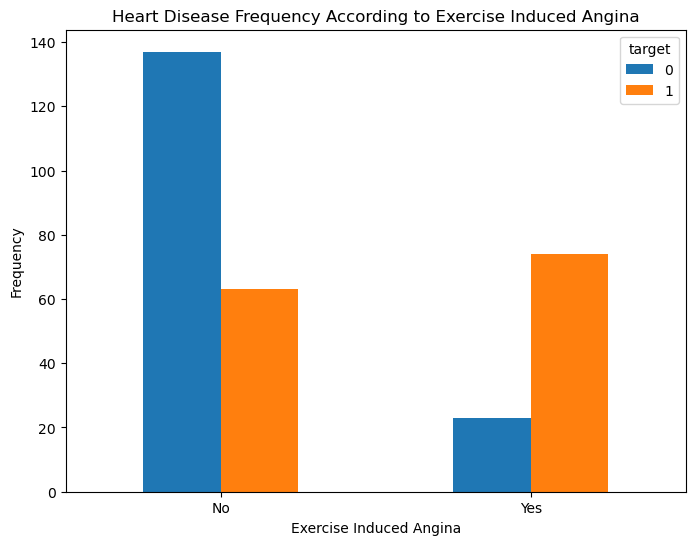

In [62]:
### Heart Disease Frequency According to Exercise Induced Angina
pd.crosstab(heart_df.exang,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [63]:
### FROM THIS WE CAN SAY ,
### The people who suffer from exercise induced angina are more likely to likely to be infected with the heart disease.

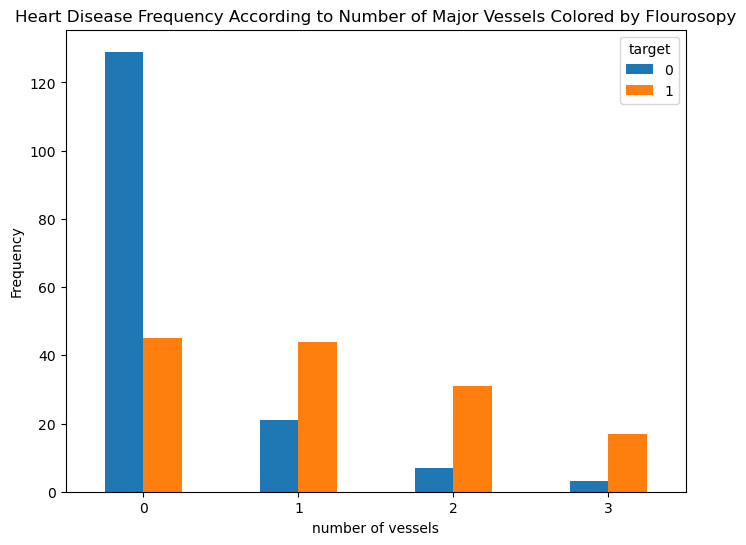

In [64]:
### Number of vessels based on the target
pd.crosstab(heart_df.ca,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [65]:
### People who do not have heart disease usually do not have major vessels colored by flourosopy

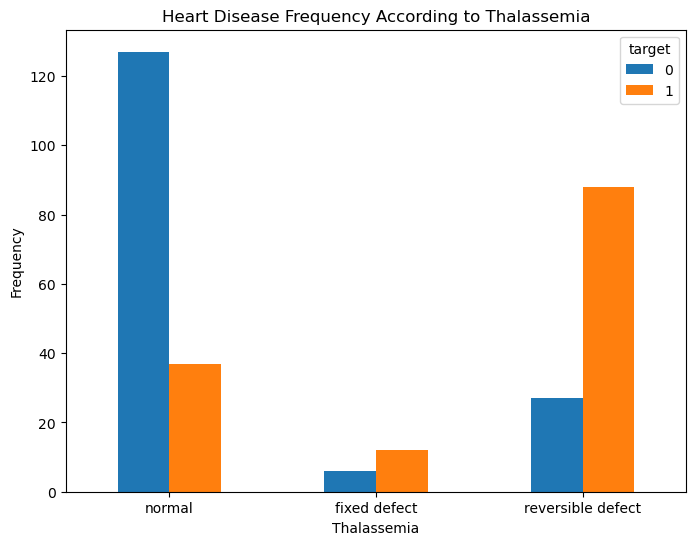

In [66]:
### Heart Disease Frequency According to Thalassemia
pd.crosstab(heart_df.thal,heart_df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

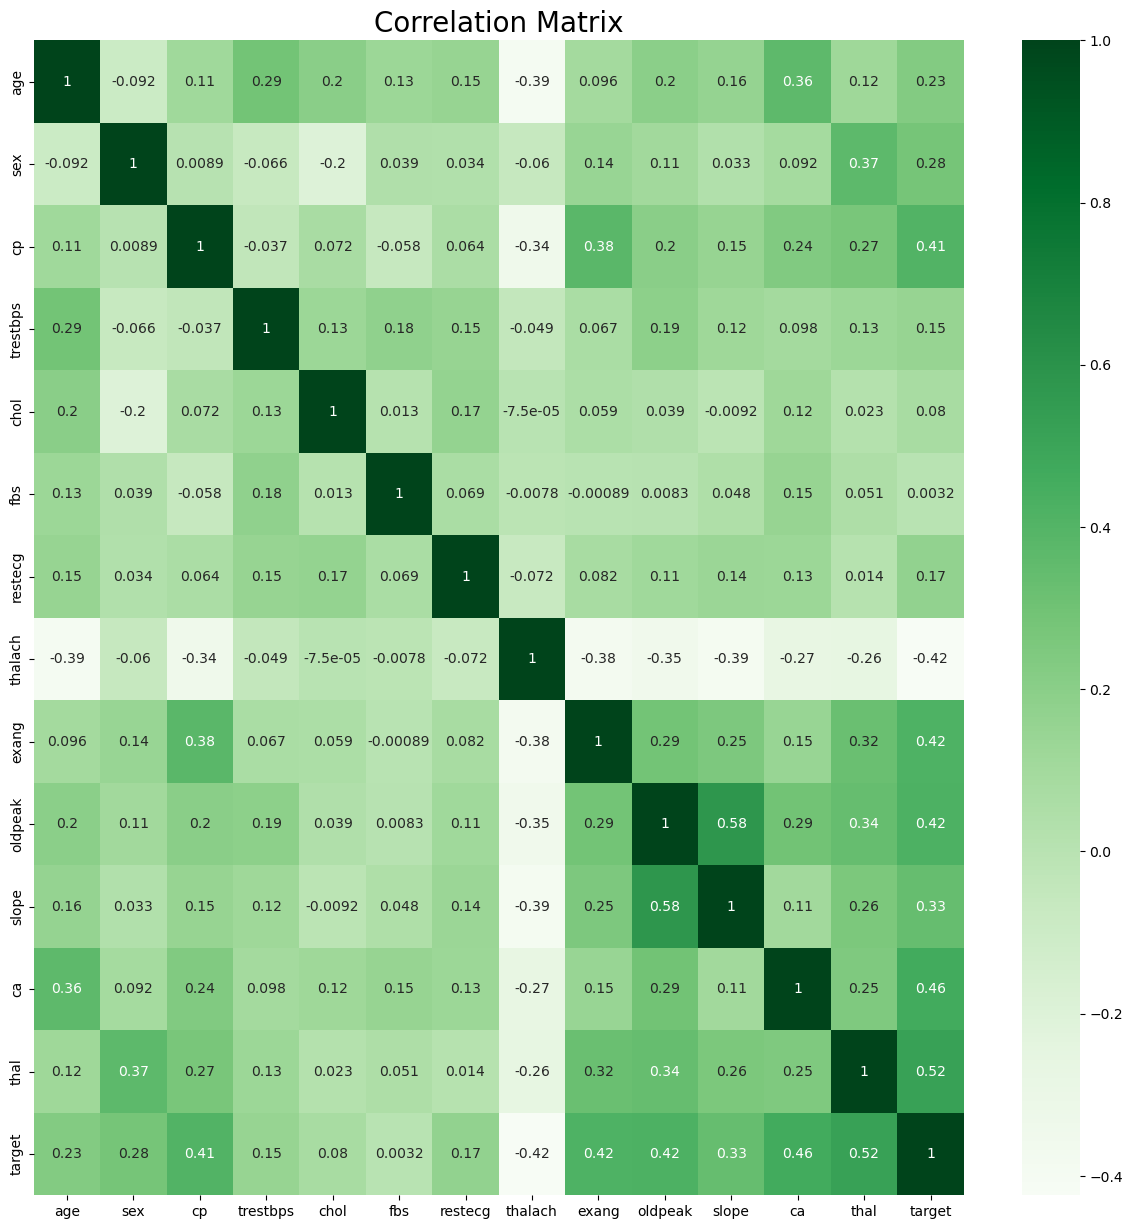

In [67]:
# Correlation map
plt.figure(figsize=(15, 15))
plt.title('Correlation Matrix', size=20)
sns.heatmap(heart_df.corr(), annot = True, cmap = "Greens")
plt.show()

In [68]:
###From the above correlation plot, the chest pain type (cp), exercise induced angina (exang), ST depression induced by 
### exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope),number of major vessels (0-3) colored
### by flourosopy (ca) and thalassemia (thal) are correlated with the heart disease (target) directly. We see also that there is
###an inverse proportion between the heart disease and maximum heart rate (thalch).

## We can see also, there are a relation between the following attributes:

### 1.The number of major vessels (0-3) colored by flourosopy (ca) and the age.
### 2.ST depression induced by exercise relative to rest (oldpeak) and the slope of the peak exercise ST segment (slope).
### 3.The chest pain type (cp), exercise induced angina (exang).
### 4.maximum heart rate (thalch) and the age.

In [69]:
###Model building and traning

In [70]:
#fixing our data in x and y. Here y contains target data and X contains rest all the features.
x= heart_df.drop(columns= 'target')
y= heart_df.target

# splitting our dataset into training and testing for this we will use train_test_split library.
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)
print('X_train size: {}, X_test size: {}'.format(x_train.shape, x_test.shape))

X_train size: (222, 13), X_test size: (75, 13)


In [71]:
### Here I have kept 25% for testing and the rest 75% is for training the model.

In [72]:
#feature scaling
scaler= StandardScaler()
x_train_scaler= scaler.fit_transform(x_train)
x_test_scaler= scaler.fit_transform(x_test)

In [73]:
### Logistic Regression Model

In [74]:
# creating Logistic Regression Model
LR_model= LogisticRegression()
LR_model.fit(x_train_scaler, y_train)
y_pred_LR= LR_model.predict(x_test_scaler)
LR_model.score(x_test_scaler,y_test)

0.76

In [75]:
print('Classification Report\n', classification_report(y_test, y_pred_LR))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_LR)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.79      0.77        38
           1       0.77      0.73      0.75        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75

Accuracy: 76.0%



In [76]:
cm = confusion_matrix(y_test, y_pred_LR)
cm

array([[30,  8],
       [10, 27]], dtype=int64)

In [77]:
### K-nearest-neighbor classifier

In [78]:
# creating Knn Model
Knn_model= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
Knn_model.fit(x_train_scaler, y_train)
y_pred_knn= Knn_model.predict(x_test_scaler)
Knn_model.score(x_test_scaler,y_test)

0.7466666666666667

In [79]:
print('Classification Report\n', classification_report(y_test, y_pred_knn))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_knn)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.75      0.73      0.74        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75

Accuracy: 74.67%



In [80]:
cm = confusion_matrix(y_test, y_pred_knn)
cm

array([[29,  9],
       [10, 27]], dtype=int64)

In [81]:
### Random Forest Classifier

In [82]:
RF_model= RandomForestClassifier(n_estimators=20)
RF_model.fit(x_train_scaler, y_train)
y_pred_RF= RF_model.predict(x_test_scaler)
RF_model.score(x_test_scaler,y_test)

0.84

In [83]:
print('Classification Report\n', classification_report(y_test, y_pred_RF))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_RF)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.84      0.84      0.84        38
           1       0.84      0.84      0.84        37

    accuracy                           0.84        75
   macro avg       0.84      0.84      0.84        75
weighted avg       0.84      0.84      0.84        75

Accuracy: 84.0%



In [84]:
cm = confusion_matrix(y_test, y_pred_RF)
cm

array([[32,  6],
       [ 6, 31]], dtype=int64)

In [85]:
### Decison Tree Classifier

In [86]:
DT_model= DecisionTreeClassifier()
DT_model.fit(x_train_scaler, y_train)
y_pred_DT= DT_model.predict(x_test_scaler)
DT_model.score(x_test_scaler,y_test)

0.7066666666666667

In [87]:
print('Classification Report\n', classification_report(y_test, y_pred_DT))
print('Accuracy: {}%\n'.format(round((accuracy_score(y_test, y_pred_DT)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        38
           1       0.67      0.78      0.72        37

    accuracy                           0.71        75
   macro avg       0.71      0.71      0.71        75
weighted avg       0.71      0.71      0.71        75

Accuracy: 70.67%



In [88]:
cm = confusion_matrix(y_test, y_pred_DT)
cm

array([[24, 14],
       [ 8, 29]], dtype=int64)

In [89]:
## Classification Accuracy is one of the most common classification evaluation metrics to compare baseline algorithms as its 
## the number of correct prediction made as a ratio of total prediction.

## so we have applied 4 machine learning algorithms including decision trees,logistic regression, random forest , knn 
## and see how each models are perfoming with the help of evaluation metics like accuracy, precision and f1 score.

In [90]:
## We can clearly see that the 
## Random forest model really perfomed well with the highest accuracy of 84 % compared to other classification model.